In [1]:
## Author: Juan Maroñas (juan.maronnas@uam.es). Machine Learning Group, Universidad Autónoma de Madrid
## Deep into Prophet through Tutorials

## A real anonymized example to illustrate holidays and additional regressors.

#  Important NOTE: Companies like to use the MAPE measure, but then predict using the mean of the distribution.
#  This is obviously wrong unless one checks if the mean is the optimal prediction attending to bayes loss i.e.:
#  argmin_\alpha \int L(\alpha,y) N(y|g(t)+*s(t)+*h(t)|sigma)dy [point estimate] or 
#  argmin_\alpha \int \int L(\alpha,y) N(y|g_w(t)+*s_w(t)+*h_w(t)|sigma)dy p(w | Y) dtheta [bayesian]. 

#  If, for example L(\alpha,y) = (\alpha - y)^2, then optimality is achieved by predicting the mean of the distribution.
#  If, for example L(\alpha,y) = |\alpha - y|, then optimality is achieved by predicting the median of the distribution.
#  Thus, one needs solve the integral for the Mape. At the moment and, as far as I know, companies like to use MAPE
#  by comparing against the mean, which is obviously wrong (unless math tells other thing). I haven't done this math.

#  For L1 you can check my thesis. For L2 is easy to show:

'''

    argmin_a \int (a - y)^2 p(y) dy. Compute derivative wrt \alpha and set to zero.
    
    d / d a \int (a - y)^2 p(y) dy = \int d / d a (a - y)^2 p(y) dy = \int 2*(a - y) p(y) dy  = 
    \int 2*a*p(y) dy - \int 2 * y * p(y) dy
    
    Then equal to 0:
    
    \int 2*a*p(y) dy - \int 2 * y * p(y) dy = 0 
    
    2*a \int p(y) dy = 2 * E[p(y)]
    
    a = E[p(y)]
    
'''

#  Thus, for correcteness, in this practical case I will use squared loss so that optimality is achieved by predicting
#  the mean.
print("")

In [89]:
## Python
import os

## Standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

usetex = mpl.checkdep_usetex(True)

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': usetex,
    'pgf.rcfonts': False,
    'xtick.bottom': True,
    'xtick.labelbottom': True,
    'ytick.left': True,
    'ytick.labelleft': True,
})

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amssymb,amsfonts,amsthm}'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25
mpl.rcParams['axes.titlesize'] = 25


## Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot


In [24]:
## Read data
data_dir = os.path.join('../data/','data_1.csv')
df       = pd.read_csv(data_dir)

# cast to datetime type
df['ds_plot'] = df['ds']
df['ds']      = pd.to_datetime(df['ds'])



Text(0.5, 1.0, 'Whole temporal serie')

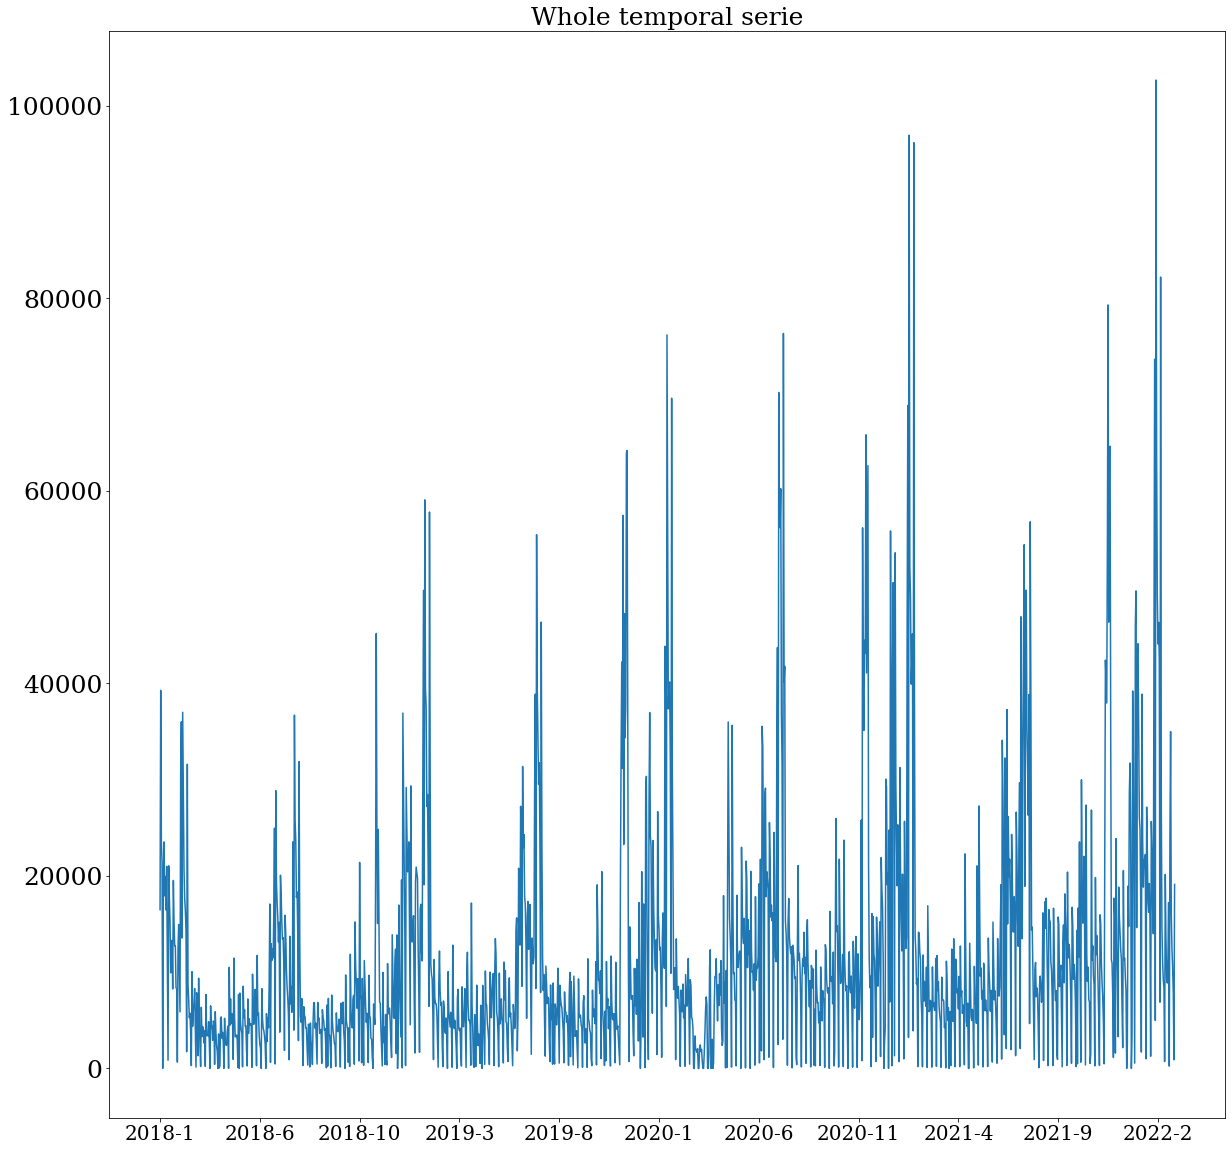

In [25]:
## Visualize whole series
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df['y']))

ax.plot(x,df['y'])
ax.set_xticks(x[0::150], labels = ['{}-{}'.format(i.year,i.month) for i,in zip(df['ds'][0::150])], fontsize = 20)
ax.set_title('Whole temporal serie')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


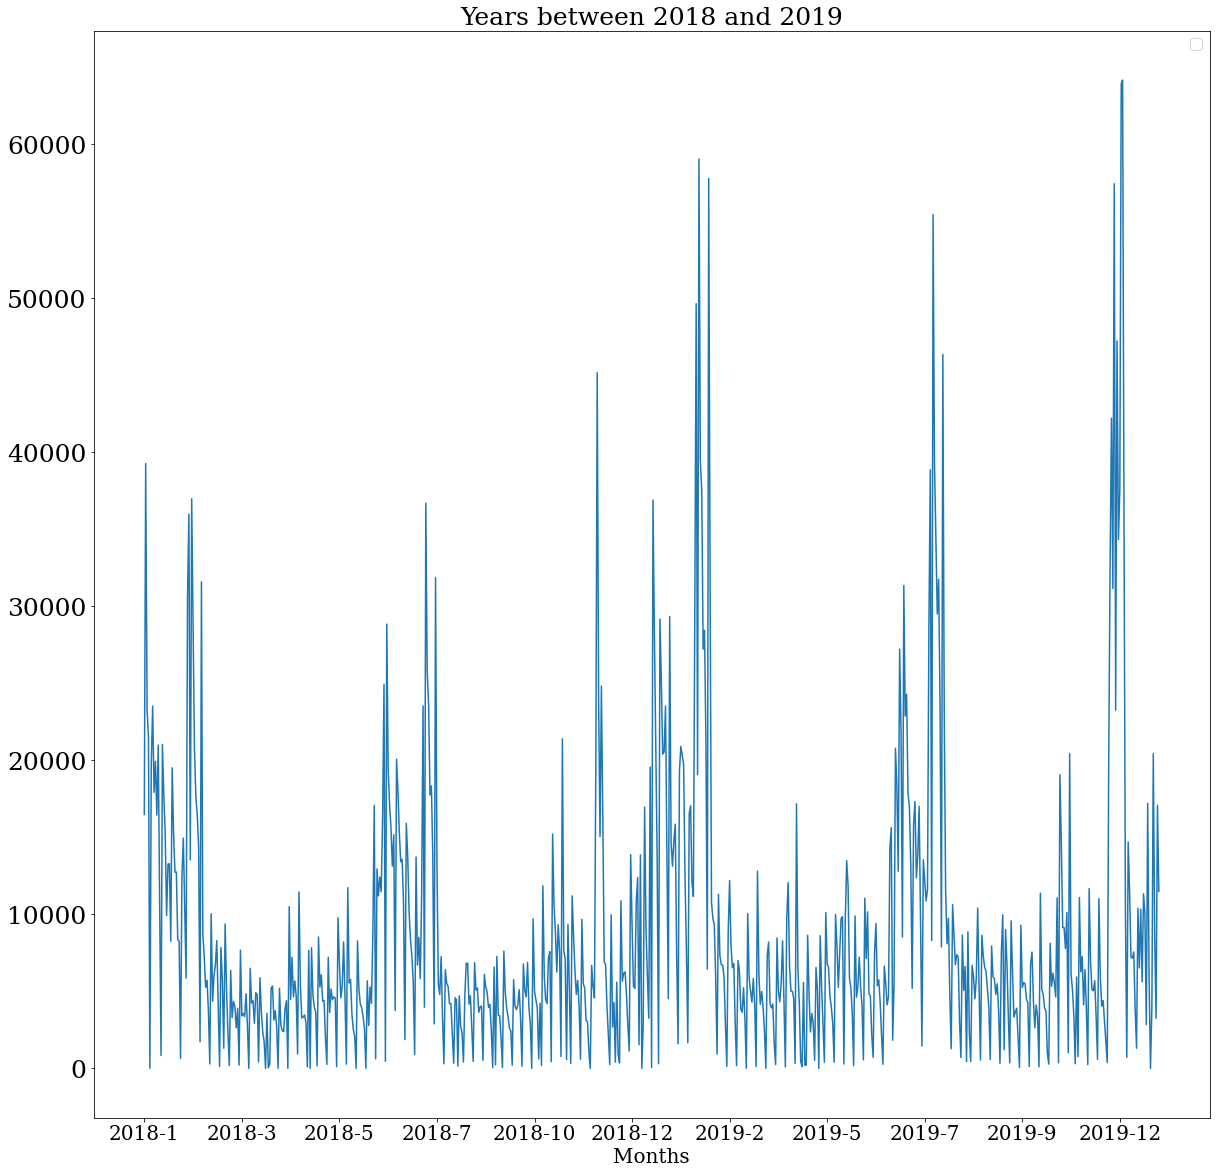

In [37]:
## Visualize two years for year periodicity
target_years = [2018, 2019]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::70], labels = ['{}-{}'.format(i.year,i.month) for i,in zip(df_one_year['ds'][0::70])], fontsize = 20)
ax.set_title('Years between {} and {}'.format(target_years[0],target_years[-1]))
ax.set_xlabel('Months')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


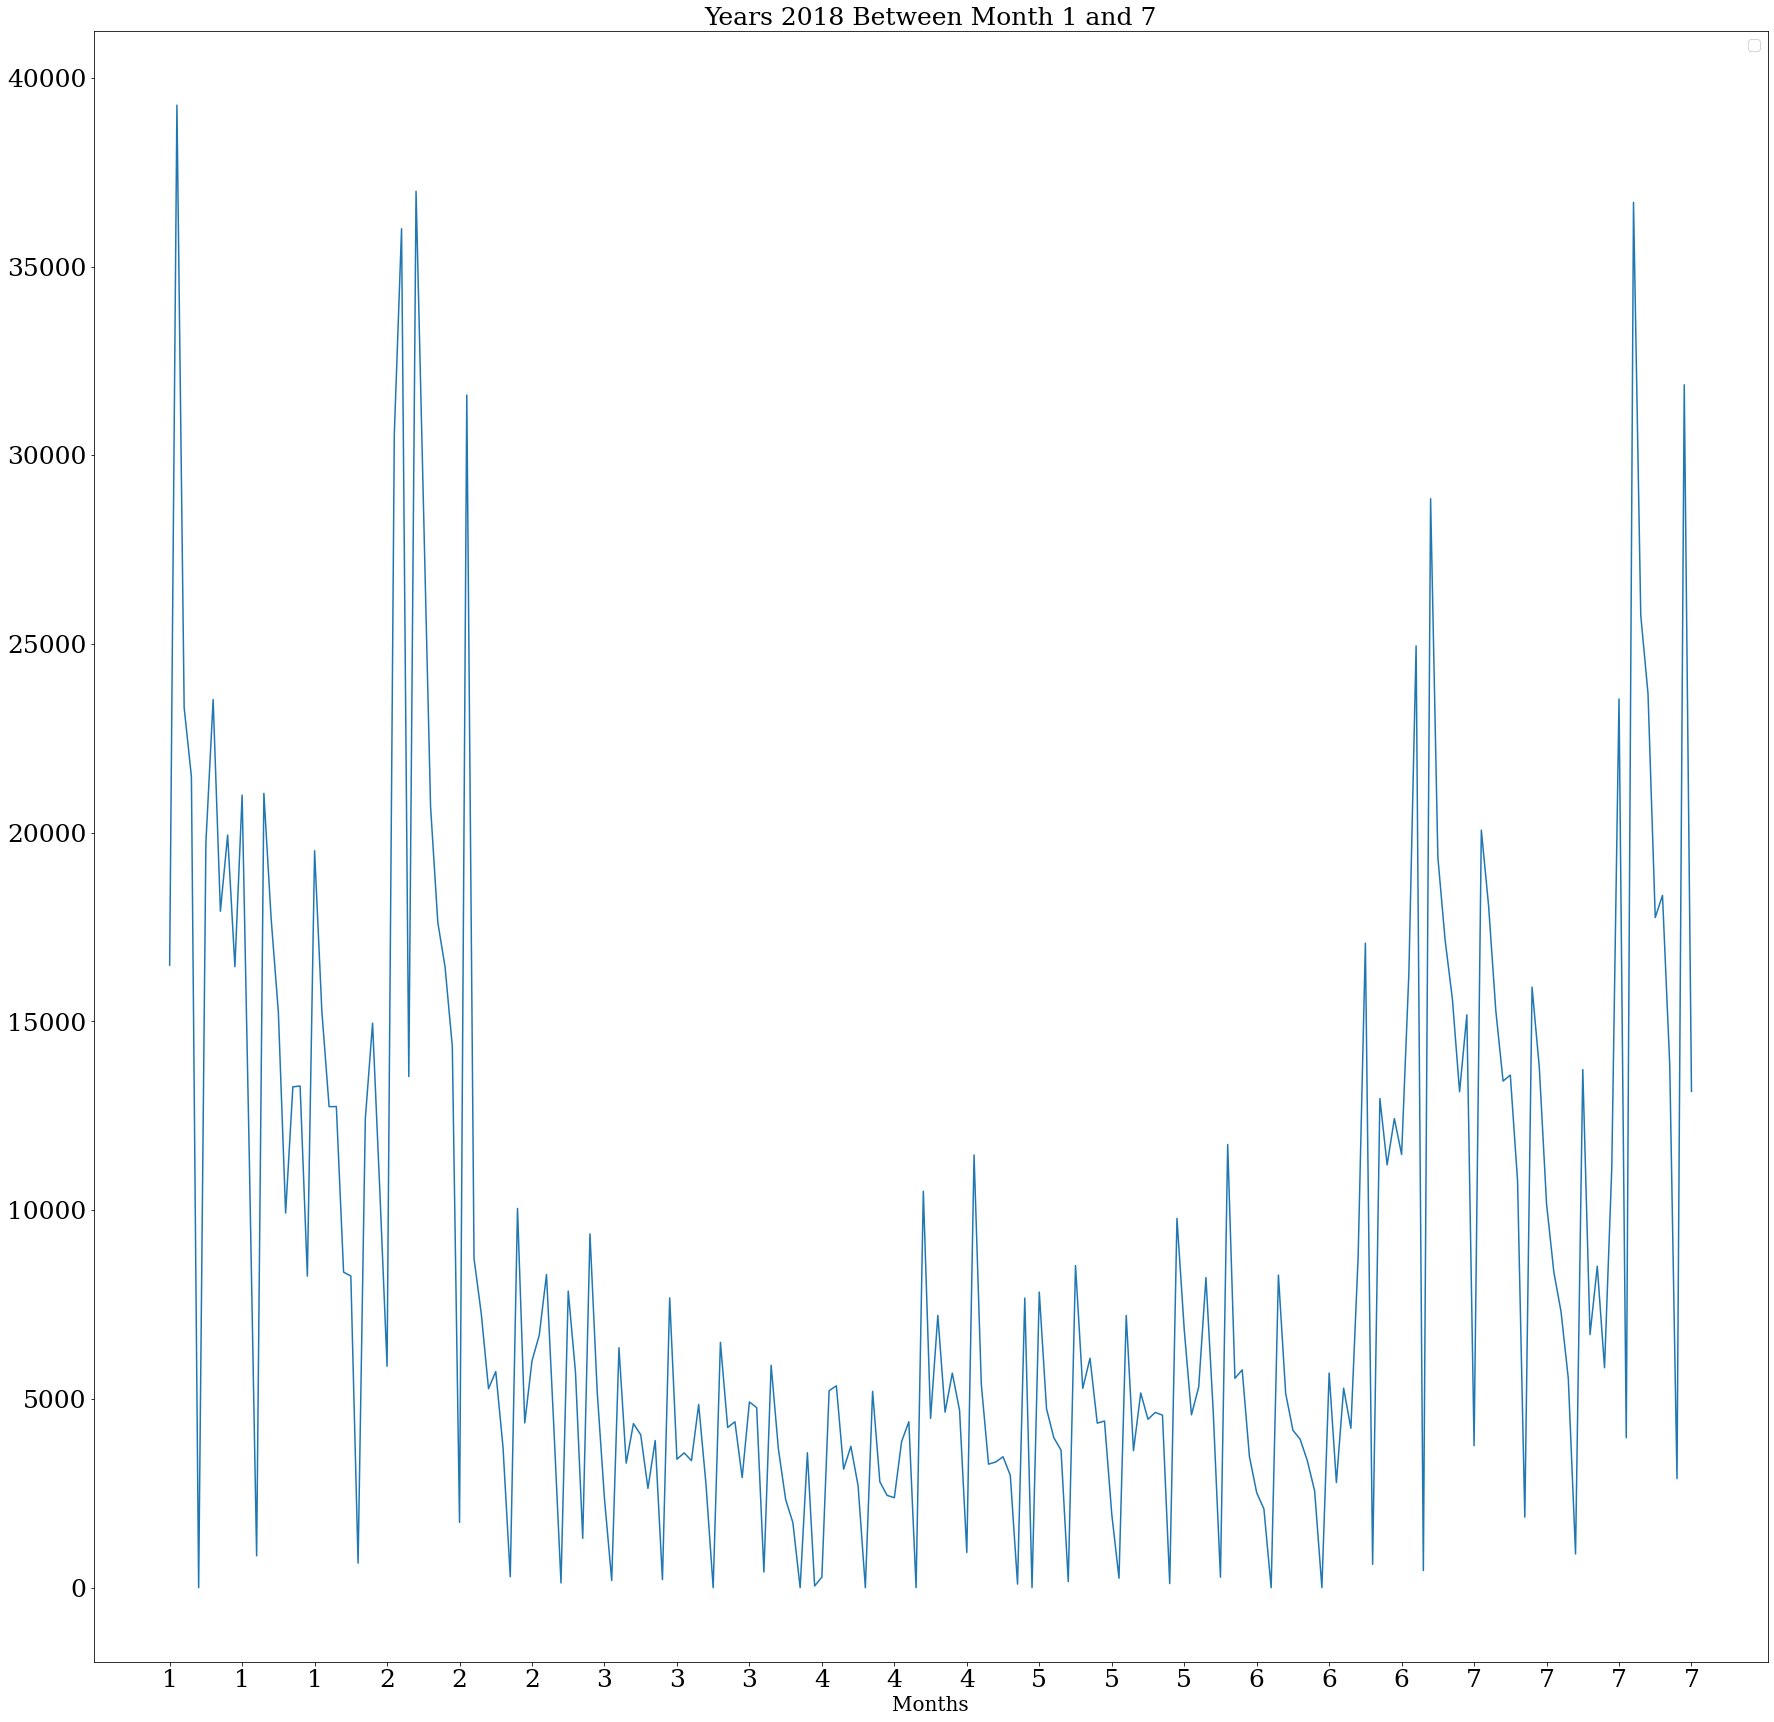

In [41]:
## Visualize a year and some months for month periodicity
target_years = [2018]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]

target_months  = [1,7]
df_one_year  = df_one_year[ (df_one_year['ds'].dt.month >= target_months[0]) & (df_one_year['ds'].dt.month <= target_months[-1]) ]
                   
fig, ax = plt.subplots(1,1,figsize=(30,30))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x[0::10], labels =  ['{}'.format(i.month) for i in df_one_year['ds'][0::10] ]  )
ax.set_title('Years {} Between Month {} and {}'.format(target_years[0],target_months[0],target_months[-1]))
ax.set_xlabel('Months')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


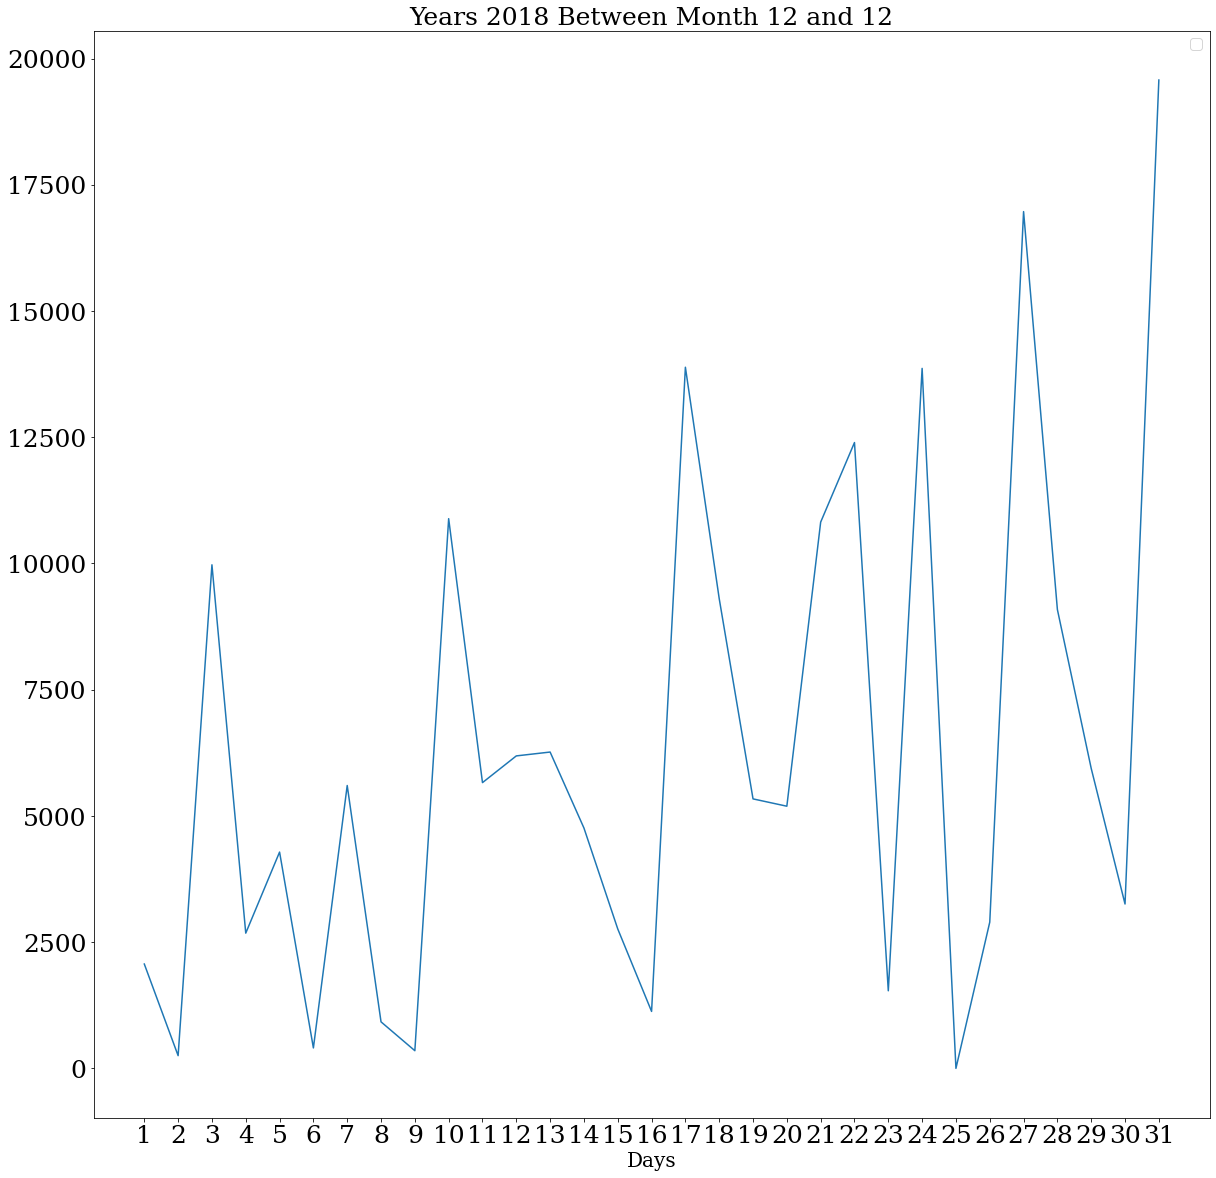

In [39]:
## Visualize a year and a month and a week for weekly periodicity
target_years = [2018, 2018]
df_one_year  = df[ (df['ds'].dt.year >= target_years[0]) & (df['ds'].dt.year <= target_years[-1]) ]

target_months  = [12,12]
df_one_year  = df_one_year[ (df_one_year['ds'].dt.month >= target_months[0]) & (df_one_year['ds'].dt.month <= target_months[-1]) ]
                   
#target_days   = [8,28] # three weeks
#df_one_year   = df_one_year[ (df_one_year['ds'].dt.day >= target_days [0]) & (df_one_year['ds'].dt.day <= target_days [-1]) ]
                   
    
fig, ax = plt.subplots(1,1,figsize=(20,20))

x = np.arange(0,len(df_one_year['y']))

ax.plot(x,df_one_year['y'])
ax.set_xticks(x, labels =  ['{}'.format(i.day) for i in df_one_year['ds'] ]  )
ax.set_title('Years {} Between Month {} and {}'.format(target_years[0],target_months[0],target_months[-1]))
ax.set_xlabel('Days')
ax.legend()


In [785]:
step_6  = True

step_7  = True

step_8  = False

step_14 = True

In [795]:
# Step 1.
weekly_N       = 10     # Change from default value 3 to 10 since looks more wiggle.

# Step 2. 
cp_prior_scale = 0.0005 # Change default (0.05) to 0.0005 so that less change points are learnt. This is because
                      # it seems the series has a constant trend.
    
# Step 3:
seasonality    = 'additive' # Change seasonality from additive to multiplicative. We might think seasonality looks like
                            # multiplicative since df[y] grows with the time, but that is well captured by an additive
                            # model with a linear trend.
# Step 4
year_N         = 20 # Change default value of 10 to a bigger one (20), since looks more wiggler.

# Step 5
weekly_N       = 20   # I thought 10 was wiggler but looking at the value of year it means week seasonality is even
                      # more wiggler. Note with a similar envelope, then the shorter the period, 
                      # the higher frequency components. Use N = 20
        

model = Prophet(
                growth                 = 'linear',    # Linear since there is no upper bound. We have a lower bound of 0.
                changepoints           = None    ,    # We want automatic changepoint detection
                yearly_seasonality     = year_N  ,    # Use default value since year seasonality looks smooth
                weekly_seasonality     = weekly_N,    # Prophet sets default to 3, but looks weekly seasonality more wiggle
                daily_seasonality      = False   ,    # We dont have subdaily data
    
                changepoint_prior_scale = cp_prior_scale, # L1 prior scale for changes in rates. Fit a less restrictive one
                seasonality_mode        = seasonality,     # Looks like multiplicative but additive is the truth value
    
                holidays               = None    , # Add the holidays as dataframe. Since we add country holidays we do so separately
    
                mcmc_samples           = 0       ,    # Fit a point estimate
                interval_width         = 0.95    ,    # 95% credible intervals
                uncertainty_samples    = 1000    ,    # One thousand samples from generative distribution
                )

# Step 6. Add monthly seasonality
if step_6:
    model.add_seasonality( 
                                name          = 'monthly'  ,
                                period        = 30         , # specified in days
                                fourier_order = 5          , # the value of N. Looks smoother function
                                mode          = 'additive' , # we set it to be aditive
                              )


# Step 7: Add spanish holidays.
holidays_country = 'ES' # We add spanish holidays. In my opinion and at least for this series this does not help too much
                        # because we have similar additional regressors affected by holidays. Changed from default
                        # 'None' to 'ES' since this is a series from a Spanish event.
if step_7:
    model.add_country_holidays( country_name = holidays_country )


# Step 8: Run default prophet just adding the holidays to check they dont bring nothing
if step_8:
    cp_prior_scale = 0.05 
    seasonality    = 'additive'
    holidays_country = 'ES'
    
    model = Prophet(
                growth                 = 'linear',    # Linear since there is no upper bound. We have a lower bound of 0.
                yearly_seasonality     = True    ,     # Use default value since year seasonality looks smooth
                weekly_seasonality     = True    ,    # Prophet sets default to 3, but looks weekly seasonality more wiggle
                daily_seasonality      = False   ,    # We dont have subdaily data
    
                changepoint_prior_scale = cp_prior_scale, # L1 prior scale for changes in rates. Fit a less restrictive one
                seasonality_mode        = seasonality,     # Looks like multiplicative but additive is the truth value
    
                holidays               = None    , # Add the holidays as dataframe. Since we add country holidays we do so separately
    
                mcmc_samples           = 0       ,    # Fit a point estimate
                interval_width         = 0.95    ,    # 95% credible intervals
                uncertainty_samples    = 1000    ,    # One thousand samples from generative distribution
                )
    model.add_country_holidays( country_name = holidays_country )

# Step 9 : same as step 8 but use cp_prior_scale = 0.0005

# Step 10 : same as step 8 but year_seasonality = 20

# Step 11 : same as step 10 but removing holidays

# Step 12: same as step 11 but cp_prior_scale = 0.0005

# Step 13: same as step 12 but adding holidays

# Step 14: Adding additional regressors
if step_14:
    model.add_regressor(
                        name        = 'reg_temp',
                        mode        = 'additive'    # or multiplicative. Defaults to seasonality_mode.
                       )
    model.add_regressor(
                        name = 'reg_1',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_2',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_3',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_4',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_5',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_6',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_7',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_8',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_9',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_10',
                        mode = 'additive'
                        )
    model.add_regressor(
                        name = 'reg_11',
                        mode = 'additive'
                        )
    
    
# step 15. Like step 14 but with default parameters

# step 16. Like step 15 but with prior_scale = 0.0005

# step 17: Like step 16 but with year_seasonality = 20

# step 18: Like step 17 but adding holidays
    
# step 19: Like step 17 but with week seasonality = 10

# step 20: Like step 17 but with week seasonality = 20

'''

seasonality_prior_scale = 10.0,       # L2 prior scale for seasonality
holidays_prior_scale    = 10.0,       # L2 prior scale for holidays


'''
print("")

In [796]:
print(df.keys())

Index(['Unnamed: 0', 'ds', 'reg_1', 'reg_2', 'reg_3', 'reg_4', 'reg_5',
       'reg_6', 'reg_7', 'reg_8', 'reg_9', 'reg_10', 'reg_11', 'reg_temp', 'y',
       'ds_plot'],
      dtype='object')


In [797]:
## Define train and validation splits
df_train = df.loc[ (df['ds'].dt.year < 2021) | ( (df['ds'].dt.year == 2021) & (df['ds'].dt.month <= 6))  ]
df_test  = df.loc[ (df['ds'].dt.year >= 2022) | ( (df['ds'].dt.year == 2021) & (df['ds'].dt.month > 6)) ]

In [798]:
model.fit(df_train)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.9004
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      53        2681.1     0.0016594       10389.5   1.656e-07       0.001      105  LS failed, Hessian reset 
      83       2691.68   1.34618e-05       10070.8   1.351e-09       0.001      191  LS failed, Hessian reset 
      99       2691.81   1.82039e-07       9888.12           1           1      212   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       2691.82   9.17809e-09       10164.8      0.4932      0.4932      230   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [799]:
full_forecast  = model.predict(df)
train_forecast = model.predict(df_train)
test_forecast  = model.predict(df_test)

/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed

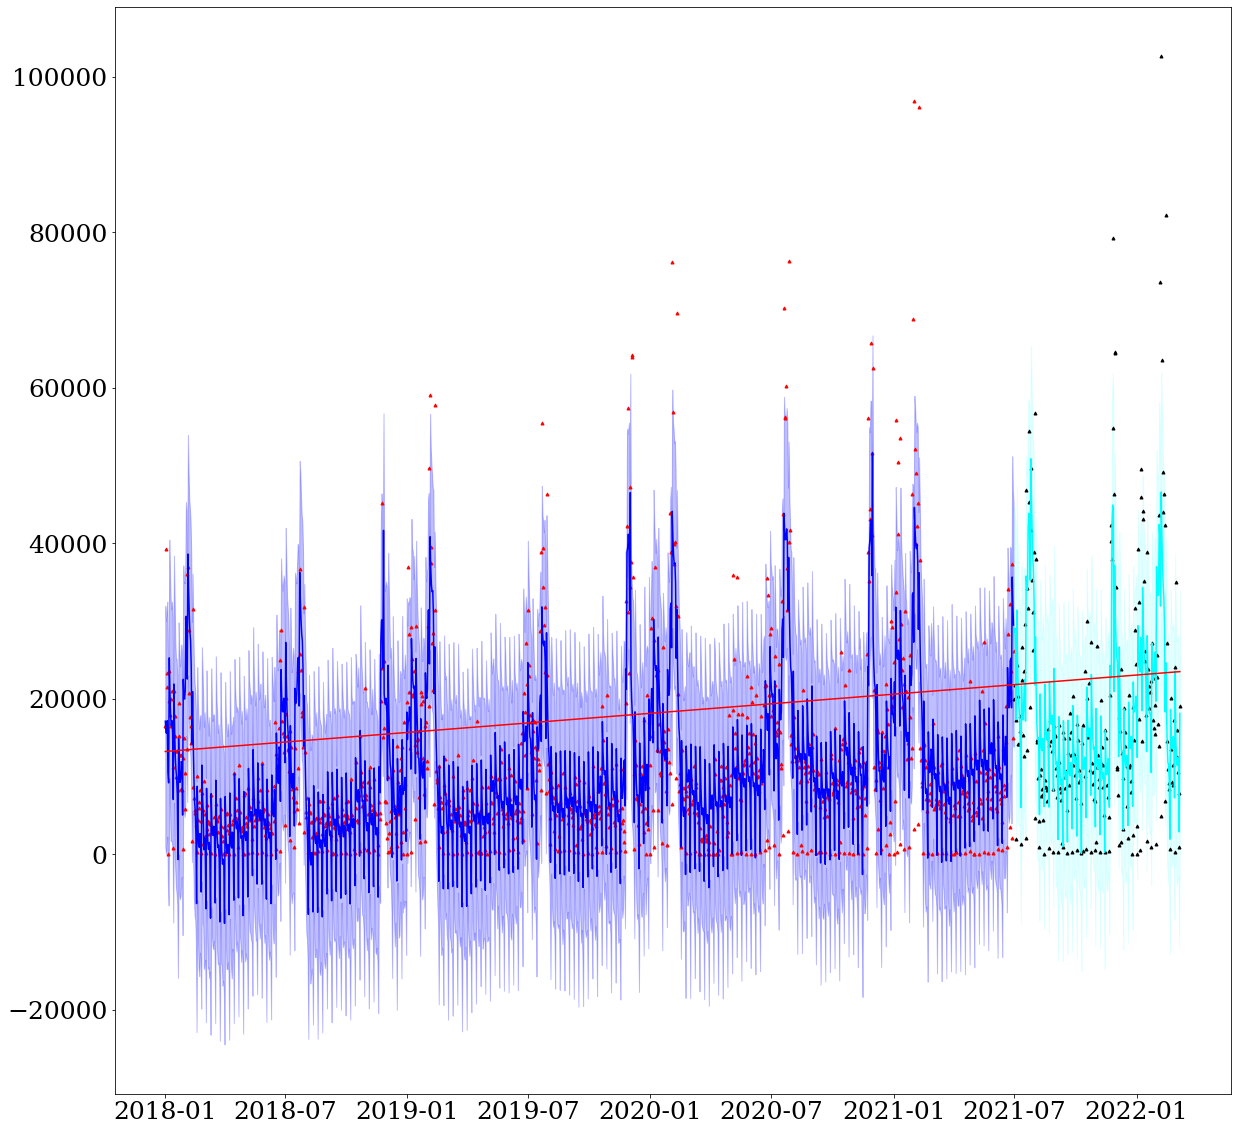

In [800]:
## Visualize forecasting
fig, ax = plt.subplots(1,1, figsize = (20,20))

# Plot data
ax.plot( df_train['ds'], df_train['y'], '^r', markersize = 3, label = 'value each day train' )
ax.plot( df_test['ds'] , df_test['y'] , '^k', markersize = 3, label = 'value each day test'  )

# Plot forecast median value
ax.plot( train_forecast['ds'], train_forecast['yhat'], color = 'blue')
ax.plot( test_forecast['ds'] , test_forecast['yhat'] , color = 'cyan')

# Plot forecast 95% credible intervals
upper  = train_forecast['yhat_upper']
lower  = train_forecast['yhat_lower']
ax.fill_between( train_forecast['ds'], lower,upper , color = 'blue', alpha = 0.25)

upper  = test_forecast['yhat_upper']
lower  = test_forecast['yhat_lower']
ax.fill_between( test_forecast['ds'], lower,upper , color = 'cyan', alpha = 0.10)

## add change points via matplotlib figure pointer
add_changepoints_to_plot(fig.gca(), model, full_forecast)
print("")

#fig = model.plot(full_forecast,figsize = (20,20))
#plt.xlabel('years')
#plt.ylabel('')
#plt.title('Full forecast')

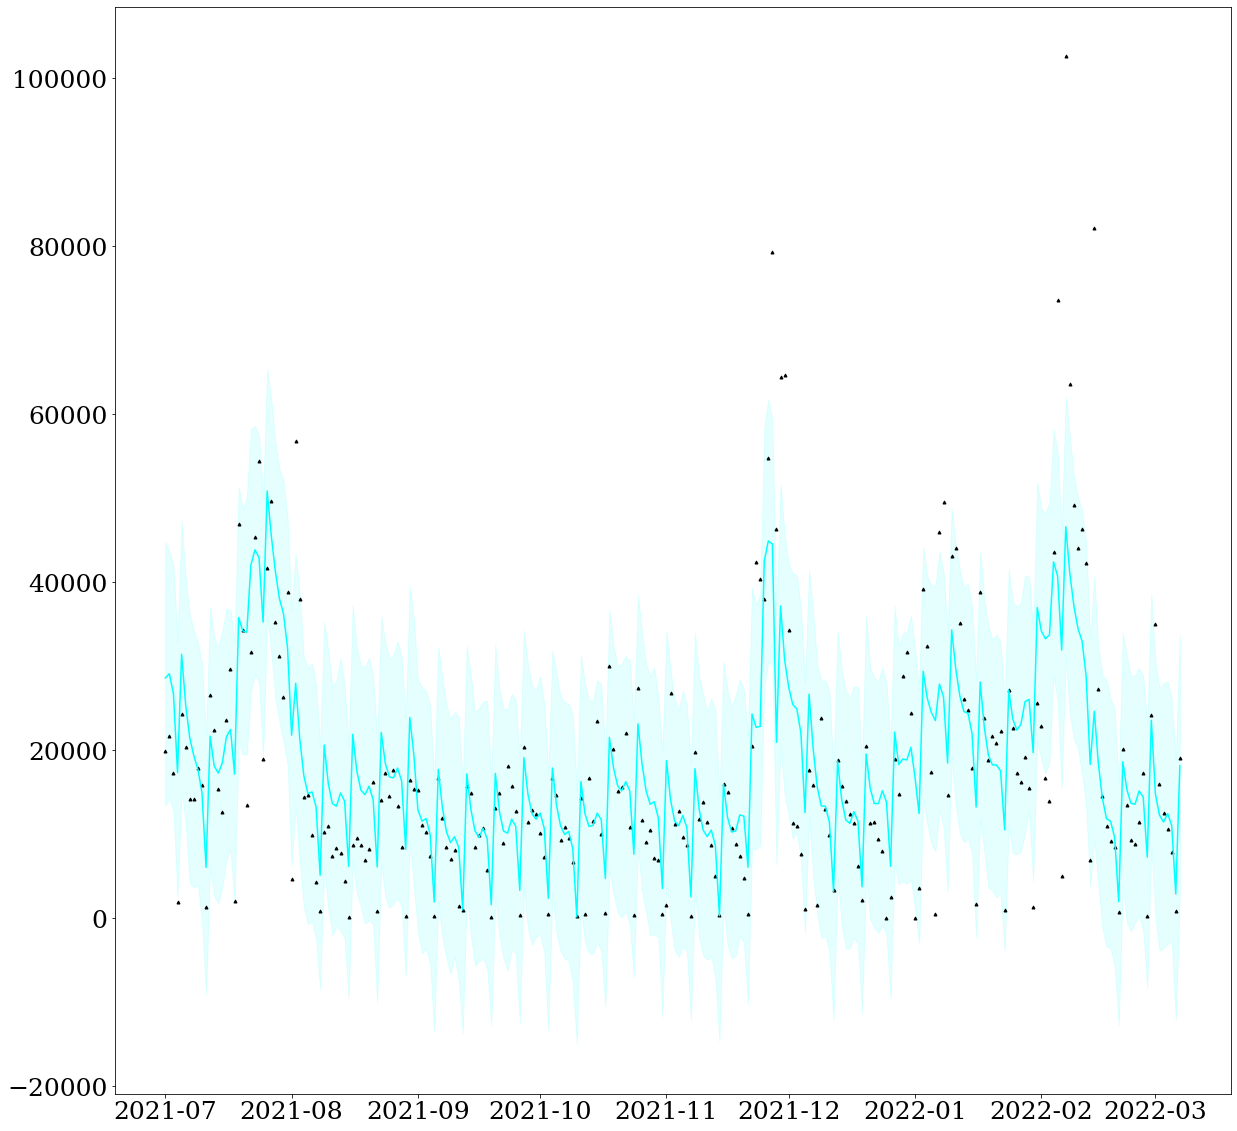

In [801]:
## Visualize forecasting. ONLY TEST
fig, ax = plt.subplots(1,1, figsize = (20,20))

# Plot data
ax.plot( df_test['ds'] , df_test['y'] , '^k', markersize = 3, label = 'value each day test'  )

# Plot forecast median value
ax.plot( test_forecast['ds'] , test_forecast['yhat'] , color = 'cyan')

# Plot forecast 95% credible intervals
upper  = test_forecast['yhat_upper']
lower  = test_forecast['yhat_lower']
ax.fill_between( test_forecast['ds'], lower,upper , color = 'cyan', alpha = 0.10)

## add change points via matplotlib figure pointer
#add_changepoints_to_plot(fig.gca(), model, test_forecast)
print("")

In [802]:
print(full_forecast.keys())


Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'Asunción de la Virgen', 'Asunción de la Virgen_lower',
       'Asunción de la Virgen_upper', 'Asunción de la Virgen (Trasladado)',
       ...
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object', length=112)


/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jmaronasm/.conda/envs/PROPHET_TUTORIAL/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed

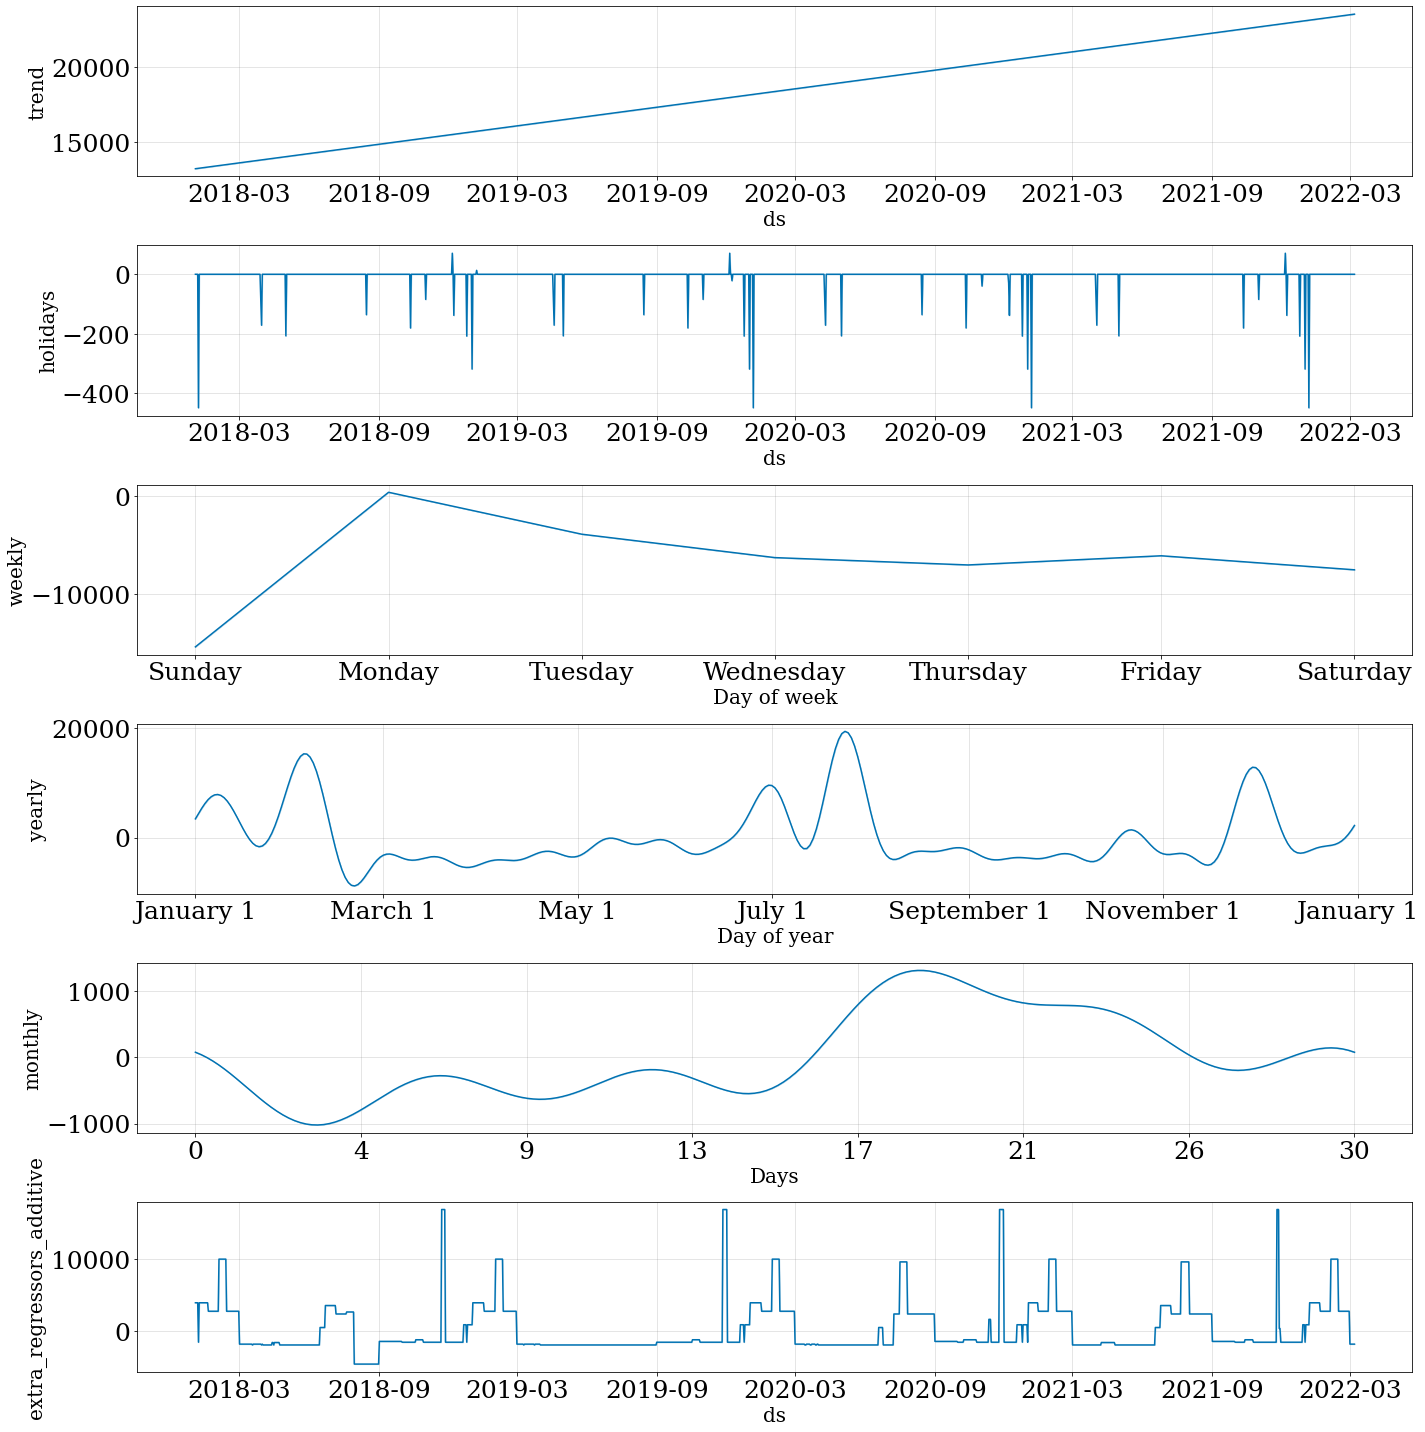

In [803]:
## Visualize the individual models used to create the observation model
fig     = model.plot_components(full_forecast, figsize = (20,20) )

if step_14:
    ax1,ax2,ax3,ax4, ax5, ax6 = fig.get_axes()
elif step_8:
    ax1,ax2,ax3, ax4 = fig.get_axes()
elif step_6 and step_7:
    ax1,ax2,ax3, ax4, ax5  = fig.get_axes()
elif step_6:
    ax1,ax2,ax3, ax4       = fig.get_axes()
else:
    ax1,ax2,ax3 = fig.get_axes()
    



<BarContainer object of 25 artists>

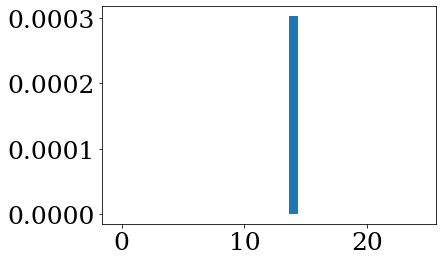

In [804]:
## Visualize rate change
plt.bar(np.arange(model.params['delta'].shape[1]),model.params['delta'].squeeze())


In [805]:
## Compute Performance measure. We predict using the mean since this is what an L2 loss tell us to do
y_pred = test_forecast['yhat'].to_numpy()
y_true = df_test['y'].to_numpy()

assert y_pred.shape == y_true.shape

Loss = np.mean((y_pred-y_true)**2)

print("Got an average squared loss off {:5f}*10^6".format(Loss / 10e6))

Got an average squared loss off 10.947690*10^6


In [807]:
'''
step 0  = 15.215325*10^6
setp 1  = 15.117674*10^6
step 2  = 14.840238*10^6
step 3  = bullshit
step 4  = 11.520308*10^6 # Get 11.690988*10^6 with N = 30 which means overfitting
setp 5  = 11.246416*10^6
step 6  = 11.238071*10^6
step 7  = 11.264692*10^6 # Does not really help
step 8  = 14.488335*10^6 # Holidays over baseline model. Improves a bit
step 9  = 14.380252*10^6 # Baseline plus holidays + removing change points
step 10 = 12.329423*10^6 
step 11 = 12.584487*10^6
step 12 = 11.165478*10^6
step 13 = 12.314291*10^6
step 14 = 10.947690*10^6
step_15 = 12.332766*10^6
step_16 = 12.058227*10^6
step_17 = 11.019910*10^6
step_18 = 11.031520*10^6
step_19 = 11.069216*10^6
step_20 = 10.857855*10^6  # BEST MODEL: same as step_14 removing monthly seasonality.
step_21 = 10.884708*10^6  # Result 20 with monthly seasonality. Holidays harm in all settings.
'''
print("")


Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
